# CSC-321: Data Mining and Machine Learning
## Assignment 3: Working with real data
## Matthew Caulfield

### Part 1: Loading Data

We've been working with contrived data, but it's time to work with 'real' data. The data we will use will be in CSV format, and we'll know that it'll require minimum wrangling - but there are still things we will need to do. 

We're going to use the built-in python module csv to read our file. It will take a csv file and return a data structure that contains lists of list. where each list will be an instance of our data. However, those lists will contain strings, and we'll need to convert them to floats, on a column by column basis. 

There are two data sets on the homework page: the wine quality dataset and the Swedish insurance data set. Download them, and put them in the same directory as this notebook.

(a) Read the overview of the csv module at: https://docs.python.org/3.1/library/csv.html

Write a function called load_data(filename) that takes a filename (a string), uses the csv reader to read in a file, then iterates through that file one line at a time and appends it to a new list, which is then returned. 

(b) Call this function on the Swedish auto data set given, and use the returned information to print a nice string. That string should tell us:

The name of the data set, the number of instances (that's the number of sublists), and the number of features (the columns in each sublist). 

(c) Print the first instance contained in the data set.

For example, if I were to load the contrived data set given last week from csv I should load the data as:  

[['1','1'],['2','3'],['4','3'],['3','2'],['5','5']] 

and report that there are 5 instances, with 2 features. I should then print:

[['1','1']]

Yes, at present, using this mechanism, the features will all be strings. We'll correct this later.

In [1]:
import csv

# Load the data
def load_data(filename):
    csvTxt = csv.reader(open(filename))
    data = []
    for row in csvTxt:
        data.append(row)
    return data

# Print nicely
insuranceData = load_data('insurance.csv')
print('insurance', 'number of rows', len(insuranceData), 'number of columns', len(insuranceData[0]))
print('First entry of insurance', insuranceData[0])


insurance number of rows 63 number of columns 2
First entry of insurance ['108', '392.5']


(c) Now we need to convert the strings to floats. That might not always be true, so we want a way to select certain columns of our data, and turn the values into floats.

Write a function called column2Float(dataset,column), that takes a dataset and a column number, and converts the elements in that column to from strings to floats. So if the data set contained:

[['1','1'],['2','3'],['4','3'],['3','2'],['5','5']]

and I called column2Float(dataset, 0), the dataset should be changed to be:

[[1.0,'1'],[2.0,'3'],[4.0,'3'],[3.0,'2'],[5.0,'5']]

Note. For memory efficiency, it's ok at this stage to make use of the the pass-by-reference nature of lists - that is, it's ok to make these changes in place, and NOT create or return another list.

(d) Call your function string2Float on the swedish auto data set you loaded previously. Use a loop to iterate through each of the columns, changing each into float values.

(e) Print the first line of the newly converted data set, to show that the entries are now floats.

In [2]:
# Write your converter function here
def column2Float(dataset,column):
    for instance in dataset:
        instance[column] = float(instance[column])
    return dataset

# Apply to the loaded Swedish auto data here
for column in range(len(insuranceData[0])):
    column2Float(insuranceData, column)

# Print nicely here
print('Converted first instance', insuranceData[0])



Converted first instance [108.0, 392.5]


### Part 2: Applying to real data

You probably noticed that the Swedish auto data set you loaded has only 2 features, which correspond to one input variable (x) and one output variable (y). Copy across your code for simple linear regression from last week, and run it on this data. I want to see:

(a) A plot of x,y of the Swedish auto data
(b) Some nice print out of a baseline of performance (What algorithm should you use?)
(c) Some nice print out of the performance of simple linear regression
(d) A line plot of the predicted y values made by simple linear regression
(e) Some discussion of the results. This will NOT be extensive. Which algorithm (apparently) performs better, the baseline or slr? What do the results MEAN, if anything?

You can find minimal information about the Swedish auto insurance data set here:
http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html

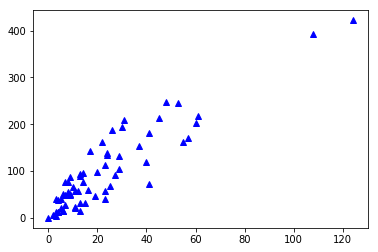

ZeroR Baseline 98.18730158730159
zeroRR RMSE: 86.632
SLR RMSE: 35.366


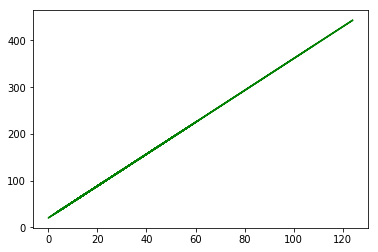

In [5]:
# Write your code for a through d here

import math
def mean(listOfValues):
    total = 0
    for num in listOfValues:
        total += num
    return total/len(listOfValues)

def variance(listOfValues, meanValue):
    total = 0
    for num in listOfValues:
       total +=  (num - meanValue)**2
    return total

def covariance(listOfX, meanOfX, listOfY, meanOfY):
    total = 0
    for i in range(len(listOfX)):
        total += (listOfX[i] - meanOfX)*(listOfY[i]-meanOfY)
    return total

def coefficients(dataset):
    dataX = [i[0] for i in dataset]
    dataY = [i[1] for i in dataset]
    meanX = mean(dataX)
    meanY = mean(dataY)
    b1 = covariance(dataX, meanX, dataY, meanY)/variance(dataX, meanX)
    b0 = meanY-b1*meanX
    return[b0, b1]

def slr(train, test):
    coeff = coefficients(train)
    b0 = coeff[0]
    b1 = coeff[1]
    predictions = []
    for i in test:
        predictions.append(b0+b1*i[0])
    return predictions

def zeroRR(train, test):
    trainY = [i[1] for i in train]
    testY = [i[1] for i in test]

    trainYMean = mean(trainY)
    predictions = []
    for i in testY:
        predictions.append(trainYMean)
    return predictions

#2a
import matplotlib.pyplot as plt
plotDataX = [i[0] for i in insuranceData]
plotDataY = [i[1] for i in insuranceData]
plt.plot(plotDataX, plotDataY,'b^')
plt.show()
#2b
def evaluate_algorithm(dataset, algorithm, metric):
    train = dataset
    test = [[i[0], None] for i in dataset]
    predicted = algorithm(train,test)
    actual = [i[1] for i in dataset]
    result = metric(actual,predicted)
    return result

def rmse_eval(actual, predicted):
    error = 0.0
    for i in range(len(actual)):
        error += (predicted[i] - actual[i])**2
    error = error/len(actual)
    error = error**0.5
    return error

predictionsZeroR = zeroRR(insuranceData, insuranceData)
zeroRR_result = evaluate_algorithm(insuranceData,zeroRR,rmse_eval)
print("ZeroR Baseline", predictionsZeroR[0])
print('zeroRR RMSE: %.3f' % zeroRR_result)

#2c
predictions = slr(insuranceData, insuranceData)
slr_result = evaluate_algorithm(insuranceData,slr,rmse_eval)

print('SLR RMSE: %.3f' % slr_result)

#2d
plt.plot(plotDataX, predictions, 'g')
plt.show()

#### Part 2 Discussion Here

The results are meaningless because we have no test data to compare how it predicts non training data. Based off of rmse of just training data the linear regression is better. 



### Part 3: Normalization

When working with data that has multiple inputs, we often want to normalize the data, so that it's all on the same scale (usually 0-1). The steps to do that are below. 

(a) Write a function minmax(dataset) that goes through your data set, and returns a list of lists. Each sublist should contain the min and the max of each column in your data. 

(b) Write a function called normalize(dataset, minmax). That code should go through each row in your data set (each instance), and normalize each value. The argument minmax should be the contents of a list as in part (f), above. The function to normalize a value, if you know the min and the max values of the column of data in which the value appears is:

normalized value = value - minOfColumn / maxOfColumn - minOfColumn

For testing, I give you the data set below, and in comments, the output of both the minmax function, and the resulting normalized data set so you can check your function

(c) Run your code on the wine quality data set. You will need to:
- Load it
- Convert it to floats
- Normalize it
When complete, print the first line of data at each step - so I should see a line corresponding to when the data was loaded, a line after conversion to floats, and a line after normalization.

In [4]:
# Write minmax and normalize here
def minmax(dataset):
    listMinMax = []
    for column in range(len(dataset[0])):
        columnData = [dataset[i][column] for i in range(len(dataset))]
        listMinMax.append([min(columnData), max(columnData)])
    return listMinMax

def normalize(dataset, minmax):
    for row in range(len(dataset)):
        for column in range(len(dataset[row])):
            dataset[row][column] = (dataset[row][column] - minmax[column][0]) / (minmax[column][1] - minmax[column][0])

# Test on the following

dataset = [[50, 30, 100], 
           [20, 90, 27], 
           [100, 45, 63], 
           [400, 25, 19]]

# minmax should return: [[20, 400], [25, 90], [19, 100]]
# normalized data should be:
# [[0.07894736842105263, 0.07692307692307693, 1.0], [0.0, 1.0, 0.09876543209876543], [0.21052631578947367, 0.3076923076923077, 0.5432098765432098], [1.0, 0.0, 0.0]]
minmaxData = minmax(dataset)
normalize(dataset, minmaxData)
print('minmax', minmaxData)
print('normalize', dataset)

# Then test on the wine quality dataset

wineData = load_data('winequality-white.csv')
print('loaded wine data', wineData[0])
for column in range(len(wineData[0])):
    column2Float(wineData, column)
print('wine data as floats', wineData[0])
minmaxWine = minmax(wineData)
normalize(wineData, minmaxWine)
print('wine data normalized', wineData[0])



minmax [[20, 400], [25, 90], [19, 100]]
normalize [[0.07894736842105263, 0.07692307692307693, 1.0], [0.0, 1.0, 0.09876543209876543], [0.21052631578947367, 0.3076923076923077, 0.5432098765432098], [1.0, 0.0, 0.0]]
loaded wine data ['7', '0.27', '0.36', '20.7', '0.045', '45', '170', '1.001', '3', '0.45', '8.8', '6']
wine data as floats [7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8, 6.0]
wine data normalized [0.30769230769230776, 0.18627450980392157, 0.21686746987951808, 0.308282208588957, 0.10682492581602374, 0.14982578397212543, 0.37354988399071926, 0.26778484673221237, 0.25454545454545446, 0.26744186046511625, 0.12903225806451626, 0.5]
